In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

#### Load an example image

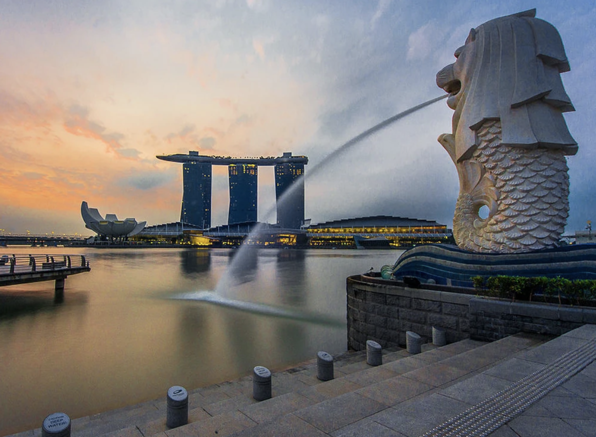

In [2]:
raw_image = Image.open("../docs/_static/merlion.png").convert("RGB")
display(raw_image.resize((596, 437)))

In [3]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Load BLIP feature extractor

In [4]:
model, vis_processors, txt_processors = load_model_and_preprocess("albef_feature_extractor", model_type="base", is_eval=True, device=device)

reshape position embedding from 256 to 196


#### Specify class names

In [5]:
cls_names = ["merlion", "sky", "giraffe", "fountain", "marina bay"]
cls_names = [txt_processors["eval"](cls_nm) for cls_nm in cls_names]

In [6]:
cls_names

['merlion', 'sky', 'giraffe', 'fountain', 'marina bay']

In [7]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### Extract image embedding and class name embeddings

In [8]:
sample = {"image": image, "text_input": cls_names}

image_features = model.extract_features(sample, mode="image").image_embeds_proj[:, 0]
text_features = model.extract_features(sample, mode="text").text_embeds_proj[:, 0]

#### Matching image embeddings with each class name embeddings

In [11]:
sims = (image_features @ text_features.t())[0] / model.temp
probs = torch.nn.Softmax(dim=0)(sims).tolist()

for cls_nm, prob in zip(cls_names, probs):
    print(f"{cls_nm}: \t {prob:.3%}")

merlion: 	 59.884%
sky: 	 1.552%
giraffe: 	 0.739%
fountain: 	 14.827%
marina bay: 	 22.998%
